### Enunciado

Basándote en este artículo, desarrolla un código que extraiga datos de una API como un JSON y posteriormente lo convierta a un DataFrame de pandas.

https://blog.resolvingpython.com/02-load-data-from-apis-to-a-pandas-dataframe-in-python


In [231]:
import requests

api_key = "QONBSQXUEKLYCEEV"
# symbol = "IBM"
symbol = "ATVI" 
url = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval=5min&apikey={api_key}"


r = requests.get(url)
r

<Response [200]>

In [232]:
r.apparent_encoding

'ascii'

In [233]:
data = r.json()

print(data)
type(data)

{'Meta Data': {'1. Information': 'Intraday (5min) open, high, low, close prices and volume', '2. Symbol': 'ATVI', '3. Last Refreshed': '2023-06-21 18:05:00', '4. Interval': '5min', '5. Output Size': 'Compact', '6. Time Zone': 'US/Eastern'}, 'Time Series (5min)': {'2023-06-21 18:05:00': {'1. open': '80.9300', '2. high': '80.9300', '3. low': '80.9300', '4. close': '80.9300', '5. volume': '101'}, '2023-06-21 17:15:00': {'1. open': '80.9300', '2. high': '80.9300', '3. low': '80.9300', '4. close': '80.9300', '5. volume': '255'}, '2023-06-21 16:30:00': {'1. open': '80.9300', '2. high': '80.9300', '3. low': '80.9300', '4. close': '80.9300', '5. volume': '250'}, '2023-06-21 16:10:00': {'1. open': '80.9300', '2. high': '80.9400', '3. low': '80.9300', '4. close': '80.9300', '5. volume': '4964'}, '2023-06-21 16:00:00': {'1. open': '80.9400', '2. high': '80.9400', '3. low': '80.9400', '4. close': '80.9400', '5. volume': '627841'}, '2023-06-21 15:55:00': {'1. open': '81.0200', '2. high': '81.0200',

dict

In [234]:
import pandas as pd

df = pd.DataFrame(data)
df

,Meta Data,Time Series (5min)
1. Information,"Intraday (5min) open, high, low, close prices ...",NaN
2. Symbol,ATVI,NaN
3. Last Refreshed,2023-06-21 18:05:00,NaN
4. Interval,5min,NaN
5. Output Size,Compact,NaN
...,...,...
2023-06-20 16:10:00,NaN,"{'1. open': '81.8700', '2. high': '81.8700', '..."
2023-06-20 16:00:00,NaN,"{'1. open': '81.8900', '2. high': '81.8900', '..."
2023-06-20 15:55:00,NaN,"{'1. open': '81.9250', '2. high': '81.9300', '..."
2023-06-20 15:50:00,NaN,"{'1. open': '81.8900', '2. high': '81.9400', '..."


In [235]:
data["Time Series (5min)"]

{'2023-06-21 18:05:00': {'1. open': '80.9300',
  '2. high': '80.9300',
  '3. low': '80.9300',
  '4. close': '80.9300',
  '5. volume': '101'},
 '2023-06-21 17:15:00': {'1. open': '80.9300',
  '2. high': '80.9300',
  '3. low': '80.9300',
  '4. close': '80.9300',
  '5. volume': '255'},
 '2023-06-21 16:30:00': {'1. open': '80.9300',
  '2. high': '80.9300',
  '3. low': '80.9300',
  '4. close': '80.9300',
  '5. volume': '250'},
 '2023-06-21 16:10:00': {'1. open': '80.9300',
  '2. high': '80.9400',
  '3. low': '80.9300',
  '4. close': '80.9300',
  '5. volume': '4964'},
 '2023-06-21 16:00:00': {'1. open': '80.9400',
  '2. high': '80.9400',
  '3. low': '80.9400',
  '4. close': '80.9400',
  '5. volume': '627841'},
 '2023-06-21 15:55:00': {'1. open': '81.0200',
  '2. high': '81.0200',
  '3. low': '80.8300',
  '4. close': '80.9500',
  '5. volume': '444975'},
 '2023-06-21 15:50:00': {'1. open': '81.1300',
  '2. high': '81.1700',
  '3. low': '81.0250',
  '4. close': '81.0250',
  '5. volume': '426246

In [243]:
df_ibm = pd.DataFrame(data['Time Series (5min)'])
df_ibm

,2023-06-21 18:05:00,2023-06-21 17:15:00,2023-06-21 16:30:00,2023-06-21 16:10:00,2023-06-21 16:00:00,2023-06-21 15:55:00,2023-06-21 15:50:00,2023-06-21 15:45:00,2023-06-21 15:40:00,2023-06-21 15:35:00,...,2023-06-20 18:15:00,2023-06-20 17:45:00,2023-06-20 17:20:00,2023-06-20 16:45:00,2023-06-20 16:20:00,2023-06-20 16:10:00,2023-06-20 16:00:00,2023-06-20 15:55:00,2023-06-20 15:50:00,2023-06-20 15:45:00
1. open,80.9300,80.9300,80.9300,80.9300,80.9400,81.0200,81.1300,81.1200,81.1250,81.1900,...,81.9000,81.9700,81.9000,81.8600,81.8500,81.8700,81.8900,81.9250,81.8900,81.9000
2. high,80.9300,80.9300,80.9300,80.9400,80.9400,81.0200,81.1700,81.1600,81.1500,81.2100,...,81.9000,81.9700,81.9000,81.8600,81.8500,81.8700,81.8900,81.9300,81.9400,81.9050
3. low,80.9300,80.9300,80.9300,80.9300,80.9400,80.8300,81.0250,81.0950,81.1000,81.1000,...,81.9000,81.9700,81.9000,81.8600,81.8500,81.8700,81.8700,81.8800,81.8600,81.8400
4. close,80.9300,80.9300,80.9300,80.9300,80.9400,80.9500,81.0250,81.1400,81.1250,81.1250,...,81.9000,81.9700,81.9000,81.8600,81.8500,81.8700,81.8700,81.8900,81.9250,81.8900
5. volume,101,255,250,4964,627841,444975,426246,125258,53792,68209,...,340,500,101,500,123,200,865165,258689,139669,74678


In [237]:
df_ibm = df_ibm.transpose()
df_ibm

,1. open,2. high,3. low,4. close,5. volume
2023-06-21 18:05:00,80.9300,80.9300,80.9300,80.9300,101
2023-06-21 17:15:00,80.9300,80.9300,80.9300,80.9300,255
2023-06-21 16:30:00,80.9300,80.9300,80.9300,80.9300,250
2023-06-21 16:10:00,80.9300,80.9400,80.9300,80.9300,4964
2023-06-21 16:00:00,80.9400,80.9400,80.9400,80.9400,627841
...,...,...,...,...,...
2023-06-20 16:10:00,81.8700,81.8700,81.8700,81.8700,200
2023-06-20 16:00:00,81.8900,81.8900,81.8700,81.8700,865165
2023-06-20 15:55:00,81.9250,81.9300,81.8800,81.8900,258689
2023-06-20 15:50:00,81.8900,81.9400,81.8600,81.9250,139669


In [238]:
df_ibm['4. close']

2023-06-21 18:05:00    80.9300
2023-06-21 17:15:00    80.9300
2023-06-21 16:30:00    80.9300
2023-06-21 16:10:00    80.9300
2023-06-21 16:00:00    80.9400
                        ...   
2023-06-20 16:10:00    81.8700
2023-06-20 16:00:00    81.8700
2023-06-20 15:55:00    81.8900
2023-06-20 15:50:00    81.9250
2023-06-20 15:45:00    81.8900
Name: 4. close, Length: 100, dtype: object

In [239]:
df_ibm = df_ibm.apply(pd.to_numeric)
df_ibm["4. close"].mean()

81.577257

array([[<Axes: title={'center': '1. open'}>,
        <Axes: title={'center': '2. high'}>,
        <Axes: title={'center': '3. low'}>],
       [<Axes: title={'center': '4. close'}>,
        <Axes: title={'center': '5. volume'}>, <Axes: >]], dtype=object)

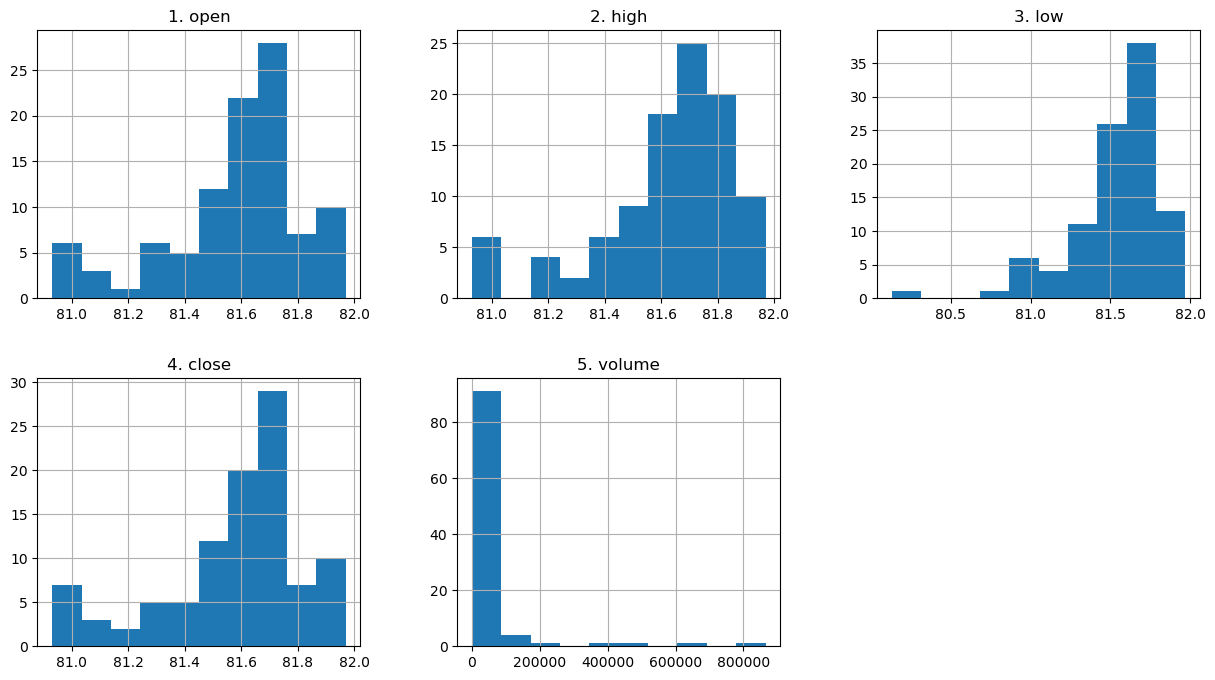

In [241]:
df_ibm.hist(layout=(2,3), figsize=(15,8))